## Imports

In [1]:
from fastai.vision import *
path = Path('data/Clouds')

## References

https://scijinks.gov/clouds/
https://www.clouds-online.com

#  Creating dataset from Google Images

## Create directory and classes

In [2]:
classes = ['Cirrus', 'Cirrostratus', 'Cirrocumulus', 'Altocumulus', 'Altostratus', 'Stratocumulus', 'Stratus', 
           'Nimbostratus', 'Cumulus', 'Cumulonimbus']

In [6]:
for c in classes:
    folder = c
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)

## Clean urls

In [9]:
import csv

In [33]:
path = Path('data/Clouds')

def url_cleaner(c):
    """
    Filter urls that contains the type of cloud wanted.
    """
    fname = 'urls_'+str(c)+'.csv'
    nfname= 'urls_'+str(c)+'_cl.csv'
    
    with open(path/'urls'/fname) as file, open(path/'urls'/nfname, mode='w') as newf:
        csv_writer = csv.writer(newf, delimiter=',')
        for line in csv.reader(file, delimiter=','):
            try:
                if c.lower() in line[0] or c in line[0]:
                    csv_writer.writerow(line)
            except:
                pass

for cl in classes:
    url_cleaner(cl)

## Download images

In [35]:
def image_downloader(c):
    """
    Automate download images files to the right folder
    """
    f_name = 'urls_'+str(c)+'_cl.csv'
    f_path = path/'urls'/f_name
    dest = path/str(c)
    download_images(f_path, dest)
    
for cl in classes:
    image_downloader(cl)
print('done')

Error http://grades.wcsuonline.org/clouds/cirrocumulus_mamma_th.jpg HTTPConnectionPool(host='grades.wcsuonline.org', port=80): Max retries exceeded with url: /clouds/cirrocumulus_mamma_th.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f736d02b2e8>: Failed to establish a new connection: [Errno 111] Connection refused'))


Error http://greencomet.org/wp-content/uploads/2013/09/altocumulus-castellan.jpg HTTPSConnectionPool(host='greencomet.org', port=443): Max retries exceeded with url: /wp-content/uploads/2013/09/altocumulus-castellan.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))


Error https://ipfs.io/ipfs/QmXoypizjW3WknFiJnKLwHCnL72vedxjQkDDP1mXWo6uco/I/m/Altostratus_clouds_over_Hong_Kong.JPG HTTPSConnectionPool(host='ipfs.io', port=443): Read timed out. (read timeout=4)
Error https://ipfs.io/ipfs/QmXoypizjW3WknFiJnKLwHCnL72vedxjQkDDP1mXWo6uco/I/m/Altostratus_clouds_over_Hong_Kong.JPG HTTPSConnectionPool(host='ipfs.io', port=443): Read timed out. (read timeout=4)


Error https://ipfs.io/ipfs/QmXoypizjW3WknFiJnKLwHCnL72vedxjQkDDP1mXWo6uco/I/m/ISS034E016601_-_Stratocumulus_Clouds_-_Pacific_Ocean.jpg HTTPSConnectionPool(host='ipfs.io', port=443): Read timed out. (read timeout=4)


Error https://i.colnect.net/f/1336/334/Stratus-nebulosus.jpg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


Error https://ipfs.io/ipfs/QmXoypizjW3WknFiJnKLwHCnL72vedxjQkDDP1mXWo6uco/I/m/Nimbostratus_clouds_in_Istanbul.jpg HTTPSConnectionPool(host='ipfs.io', port=443): Read timed out. (read timeout=4)
Error https://ipfs.io/ipfs/QmXoypizjW3WknFiJnKLwHCnL72vedxjQkDDP1mXWo6uco/I/m/Nimbostratus.jpg HTTPSConnectionPool(host='ipfs.io', port=443): Read timed out. (read timeout=4)


Error https://gb.fotolibra.com/images/previews/484794-clouds-cumulonimbus-capillatus.jpeg HTTPSConnectionPool(host='gb.fotolibra.com', port=443): Max retries exceeded with url: /images/previews/484794-clouds-cumulonimbus-capillatus.jpeg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error https://thumbs.dreamstime.com/z/cumulonimbus-incus-cloud-evening-sky-gigantic-its-characteristic-flat-anvil-like-top-sunset-singapore-54141995.jpg HTTPSConnectionPool(host='thumbs.dreamstime.com', port=443): Read timed out. (read timeout=4)
Error http://learnweather.com/wp-content/gallery/supercells/Cumulonimbus-capillatus-incus-thick-backsheared-anvil-LW-3.jpg HTTPConnectionPool(host='learnweather.com', port=80): Max retries exceeded with url: /wp-content/gallery/supercells/Cumulonimbus-capillatus-incus-thick-backsheared-anvil-LW-3.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 

# Build DataBunch

In [2]:
np.random.seed(42)
path = Path('data/Clouds')
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(do_flip=False), size=224, num_workers=4).normalize(imagenet_stats)

In [3]:
data.classes

['Altocumulus',
 'Altostratus',
 'Cirrocumulus',
 'Cirrostratus',
 'Cirrus',
 'Cumulonimbus',
 'Cumulus',
 'Nimbostratus',
 'Stratocumulus',
 'Stratus']

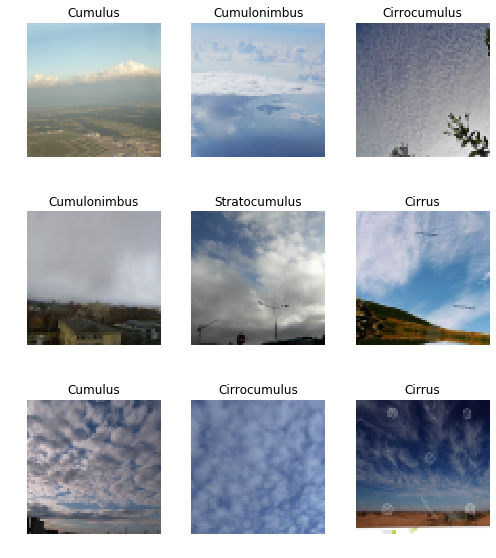

In [4]:
data.show_batch(rows=3, figsize=(7,8))

In [5]:
print('Classes:',data.c),
print('Train_set size:',len(data.train_ds))
print('Validation_set size:', len(data.valid_ds))

Classes: 10
Train_set size: 1944
Validation_set size: 486


# Train model

In [6]:
learn = cnn_learner(data, models.resnet34, metrics= error_rate)

In [7]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,2.484708,1.770234,0.613169,01:00
1,1.975348,1.485011,0.502058,00:52
2,1.666914,1.414862,0.473251,00:54
3,1.458884,1.365155,0.427984,00:52
4,1.304585,1.335270,0.434156,00:52
5,1.201468,1.327528,0.432099,00:57


In [8]:
learn.save('stage1')

In [9]:
learn.unfreeze()

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


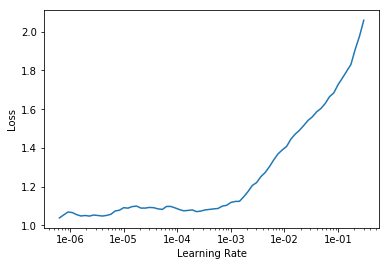

In [11]:
learn.recorder.plot()

In [12]:
learn.load('stage1')
learn.fit_one_cycle(4, max_lr=slice(1e-6,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.091331,1.304769,0.413580,00:53
1,1.033239,1.282775,0.401235,00:53
2,0.972100,1.257567,0.388889,00:54
3,0.918450,1.247799,0.388889,00:55


In [13]:
learn.save('stage2')

## Interpret

In [43]:
learn.load('stage2')

Learner(data=ImageDataBunch;

Train: LabelList (1944 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Stratus,Stratus,Stratus,Stratus,Stratus
Path: data/Clouds;

Valid: LabelList (486 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Altocumulus,Cumulonimbus,Altocumulus,Cumulus,Cirrocumulus
Path: data/Clouds;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, mom

In [44]:
interp = ClassificationInterpretation.from_learner(learn)

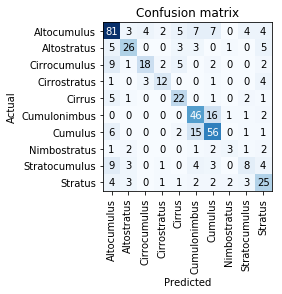

In [16]:
interp.plot_confusion_matrix()

In [51]:
import shutil

In [64]:
d_path = Path('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/Perso/data/Clouds')
z_path = Path('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/Perso/data')

In [65]:
shutil.make_archive(z_path/'clouds_db.zip', 'zip', d_path)

'/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/Perso/data/clouds_db.zip.zip'

# Train better

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=64, num_workers=4).normalize(imagenet_stats)

In [7]:
learn = cnn_learner(data, models.resnet34, metrics= error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


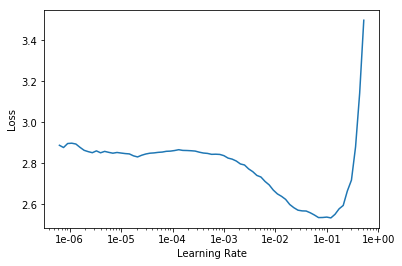

In [8]:
lr_find(learn)
learn.recorder.plot()

In [9]:
lr = 1e-2

In [10]:
learn.fit_one_cycle(6, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,2.384778,1.803942,0.567901,00:41
1,2.098343,1.712035,0.578189,00:38
2,1.918115,1.594761,0.555556,00:41
3,1.769660,1.499916,0.502058,00:40
4,1.609269,1.432043,0.479424,00:39
5,1.512878,1.429071,0.473251,00:38


In [11]:
learn.save('stage1')

In [12]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


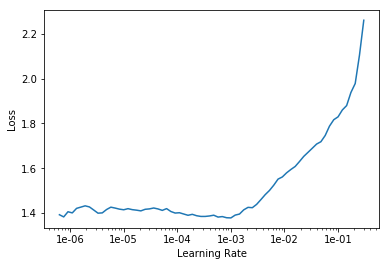

In [13]:
lr_find(learn)
learn.recorder.plot()

In [14]:
lr = 1e-4

In [15]:
learn.fit_one_cycle(6, max_lr=slice(lr/100, lr))

epoch,train_loss,valid_loss,error_rate,time
0,1.403613,1.419613,0.479424,00:42
1,1.375617,1.413507,0.469136,00:40
2,1.347042,1.400671,0.462963,00:41
3,1.321051,1.375452,0.458848,00:40
4,1.292037,1.370296,0.460905,00:39
5,1.272785,1.377061,0.454733,00:40


In [16]:
learn.save('stage2')

In [17]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=124, num_workers=4).normalize(imagenet_stats)

In [18]:
learn = cnn_learner(data, models.resnet34, metrics= error_rate).load('stage2')

In [19]:
learn.freeze()

In [21]:
lr_find(learn)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


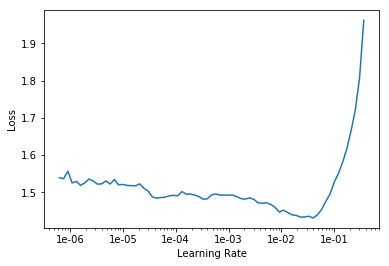

In [22]:
learn.recorder.plot()

In [23]:
lr = 3e-3

In [24]:
learn.fit_one_cycle(6, max_lr = lr)

epoch,train_loss,valid_loss,error_rate,time
0,1.430197,1.451870,0.493827,00:43
1,1.366236,1.372859,0.436214,00:45
2,1.260215,1.275461,0.405350,00:46
3,1.139252,1.260572,0.405350,00:45
4,1.037558,1.257443,0.386831,00:42
5,0.971173,1.245716,0.384774,00:41


In [25]:
learn.save('stage3')

In [26]:
learn.load('stage3')

Learner(data=ImageDataBunch;

Train: LabelList (1944 items)
x: ImageList
Image (3, 124, 124),Image (3, 124, 124),Image (3, 124, 124),Image (3, 124, 124),Image (3, 124, 124)
y: CategoryList
Stratus,Stratus,Stratus,Stratus,Stratus
Path: data/Clouds;

Valid: LabelList (486 items)
x: ImageList
Image (3, 124, 124),Image (3, 124, 124),Image (3, 124, 124),Image (3, 124, 124),Image (3, 124, 124)
y: CategoryList
Altocumulus,Cumulonimbus,Altocumulus,Cumulus,Cirrocumulus
Path: data/Clouds;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, mom

In [27]:
learn.unfreeze()

In [28]:
lr_find(learn)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


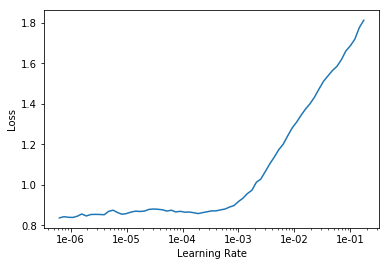

In [30]:
learn.recorder.plot()

In [31]:
lr = slice( 2e-7, 2e-5)

In [32]:
learn.fit_one_cycle(6, max_lr = lr)

epoch,train_loss,valid_loss,error_rate,time
0,0.883670,1.246289,0.388889,00:42
1,0.868980,1.247875,0.390947,00:43
2,0.866027,1.243938,0.380658,00:42
3,0.870994,1.245815,0.386831,00:43
4,0.870254,1.241971,0.382716,00:43
5,0.868874,1.239764,0.380658,00:43


In [33]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [34]:
learn = cnn_learner(data, models.resnet34, metrics= error_rate).load('stage3')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


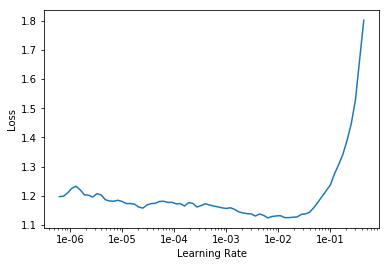

In [35]:
lr_find(learn)
learn.recorder.plot()

In [37]:
lr = 2e-3

In [38]:
learn.fit_one_cycle(6, max_lr = lr)

epoch,train_loss,valid_loss,error_rate,time
0,1.131550,1.260494,0.405350,00:50
1,1.045350,1.245143,0.411523,00:49
2,0.993787,1.193987,0.403292,00:50
3,0.918233,1.142323,0.380658,00:48
4,0.837794,1.146768,0.378601,00:50
5,0.779974,1.149371,0.372428,00:49


In [39]:
learn.save('stage4')

In [40]:
learn.load('stage4')

Learner(data=ImageDataBunch;

Train: LabelList (1944 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Stratus,Stratus,Stratus,Stratus,Stratus
Path: data/Clouds;

Valid: LabelList (486 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Altocumulus,Cumulonimbus,Altocumulus,Cumulus,Cirrocumulus
Path: data/Clouds;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, mom

In [41]:
learn.unfreeze()

In [42]:
lr_find(learn)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


NameError: name 'leanr' is not defined

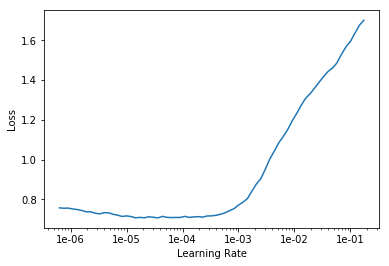

In [43]:
learn.recorder.plot()

In [45]:
lr = slice(2e-7, 2e-5)

In [46]:
learn.fit_one_cycle(6, max_lr = lr)

epoch,train_loss,valid_loss,error_rate,time
0,0.746746,1.151605,0.380658,00:50
1,0.740646,1.144397,0.378601,00:46
2,0.733662,1.142904,0.370370,00:50
3,0.718676,1.138742,0.372428,00:47
4,0.703138,1.137885,0.370370,00:52
5,0.702683,1.138521,0.358025,00:50


In [48]:
learn.save('stage5')

In [52]:
learn.export()